In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [103]:
df=pd.read_csv('C:/Users/lilyr/Downloads/salaryData.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [104]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [105]:
df=df.dropna()

In [106]:
df.duplicated().sum()

49

In [107]:
df=df.drop_duplicates()

In [108]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [109]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [151]:
df.to_csv('salaryCleaned.csv')

In [110]:
label_encoder=LabelEncoder()
df['Gender_encoded']=label_encoder.fit_transform(df['Gender'])
df['Education level_encoded']=label_encoder.fit_transform(df['Education Level'])
df['Job Title_encoded']=label_encoder.fit_transform(df['Job Title'])
df                                                    

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education level_encoded,Job Title_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22
...,...,...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0,0,68
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,1,0,111
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,0,2,115
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,1,0,63


In [111]:
df_updated=df.drop(['Gender','Job Title','Education Level'],axis=1)
df_updated.head()

,Age,Years of Experience,Salary,Gender_encoded,Education level_encoded,Job Title_encoded
0,32.0,5.0,90000.0,1,0,159
1,28.0,3.0,65000.0,0,1,17
2,45.0,15.0,150000.0,1,2,130
3,36.0,7.0,60000.0,0,0,101
4,52.0,20.0,200000.0,1,1,22


In [112]:
correlation=df[['Age','Years of Experience','Salary','Gender_encoded','Education level_encoded','Job Title_encoded']].corr()
correlation_with_salary=correlation['Salary'].sort_values(ascending=False)
correlation_with_salary

Salary                     1.000000
Years of Experience        0.924455
Age                        0.916543
Education level_encoded    0.661900
Job Title_encoded          0.135939
Gender_encoded             0.075420
Name: Salary, dtype: float64

In [113]:
df_final=df_updated.drop(['Gender_encoded'],axis=1)
df_final

,Age,Years of Experience,Salary,Education level_encoded,Job Title_encoded
0,32.0,5.0,90000.0,0,159
1,28.0,3.0,65000.0,1,17
2,45.0,15.0,150000.0,2,130
3,36.0,7.0,60000.0,0,101
4,52.0,20.0,200000.0,1,22
...,...,...,...,...,...
348,28.0,1.0,35000.0,0,68
349,36.0,8.0,110000.0,0,111
350,44.0,16.0,160000.0,2,115
351,31.0,3.0,55000.0,0,63


In [114]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [115]:
X = df_final[['Age','Years of Experience','Education level_encoded','Job Title_encoded']]
y = df_final['Salary']

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [117]:
X_train.head()

,Age,Years of Experience,Education level_encoded,Job Title_encoded
248,41.0,11.0,0,143
10,29.0,3.0,1,158
29,33.0,6.0,1,92
323,47.0,20.0,2,24
43,36.0,8.0,0,2


In [118]:
y_train.head()

248     95000.0
10      75000.0
29      90000.0
323    180000.0
43      45000.0
Name: Salary, dtype: float64

In [119]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred=model.predict(X_test)

In [121]:
y_pred,y_test

(array([ 64231.35370063,  94092.53128297,  28757.91632923,  82791.44842504,
        158412.97191133,  53866.28041923, 182619.77528632,  64416.69185804,
        152536.11706987,  42088.61372796,  54721.59346684, 173912.37434087,
         75585.39031782, 190265.48834896, 159104.15722323, 101976.53626228,
         80258.77317128, 106698.95322465,  50093.11147319, 196055.03339598,
        106121.72833073,  83873.08083953,  88342.7015554 ,  81995.79522856,
         41276.93565013, 104012.68315104,  52480.163889  ,  56637.24758967,
         84190.80339509,  80483.82664813,  39675.08443253,  49523.85856115,
        115706.99955308, 164287.30688151, 156216.6169372 , 116329.20622438,
        125809.87688093, 165211.42482581,  56187.14063596,  50529.97998708,
        122249.86977952,  52308.0641714 ,  64363.73809878,  48209.11977036,
        145486.13379891, 158464.578863  ,  52480.163889  , 128278.97263324,
        162744.94177112,  72439.61358345,  37446.8932945 ,  97771.68434271,
        1289

In [122]:
#calculating the root squared error(rmse),used to evaluate perfomance of the regression  model
err=np.sqrt(mean_squared_error(y_test,y_pred))
err

14746.318598569902

In [123]:
#RMSE as a percentage of the mean
y_mean=np.mean(y_test)
rmse=err
p_err=(rmse/y_mean)*100
p_err

15.598221463092656

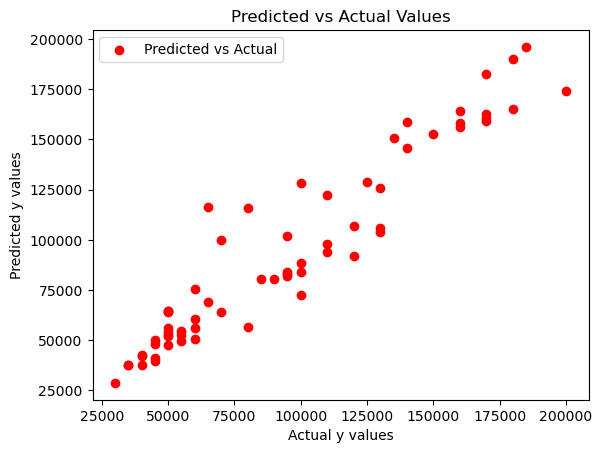

In [124]:
plt.scatter(y_test, y_pred, color='red', label='Predicted vs Actual')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [125]:
pickle.dump(model,open('Linearmodel.1b','wb'))